In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install scikit-learn==1.4.2

In [3]:
# load csv dataset
df=pd.read_csv('D:\Documents C\HUB\Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#deleting the column named ID
df=df.drop(columns=['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#display the basic stats of the data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
# display the number of samples in each class
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [8]:
#check for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<Axes: >

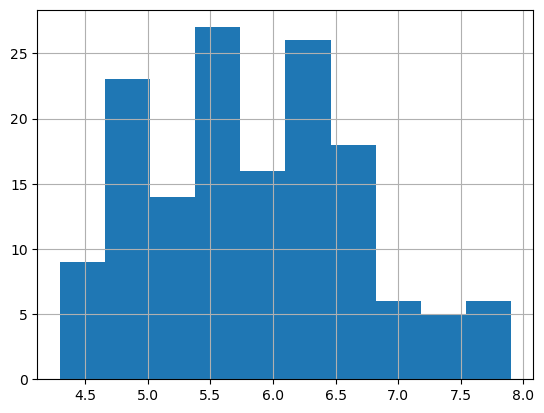

In [9]:
df['SepalLengthCm'].hist()

<Axes: >

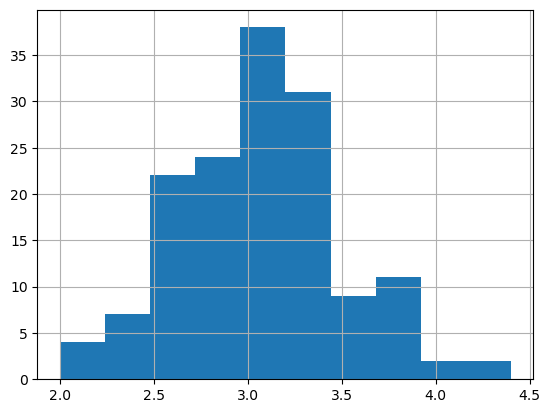

In [10]:
df['SepalWidthCm'].hist()

<Axes: >

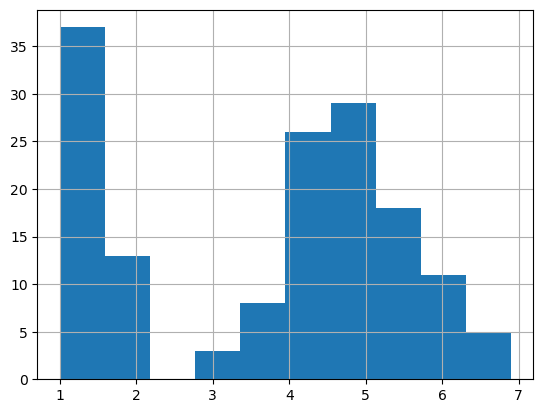

In [11]:
df['PetalLengthCm'].hist()

<Axes: >

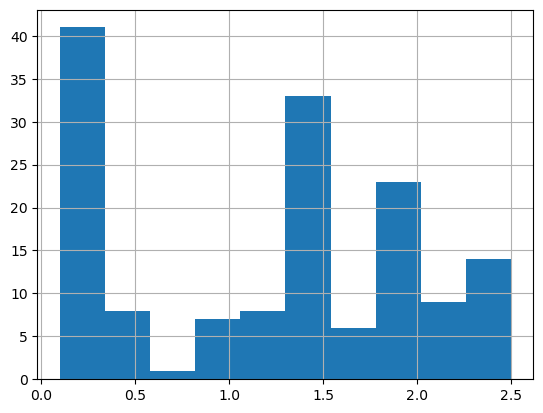

In [12]:
df['PetalWidthCm'].hist()


In [13]:
#create list of colours and class labels
colors=['red','orange','blue']
species=['Iris-virginica','Iris-versicolor','Iris-setosa']

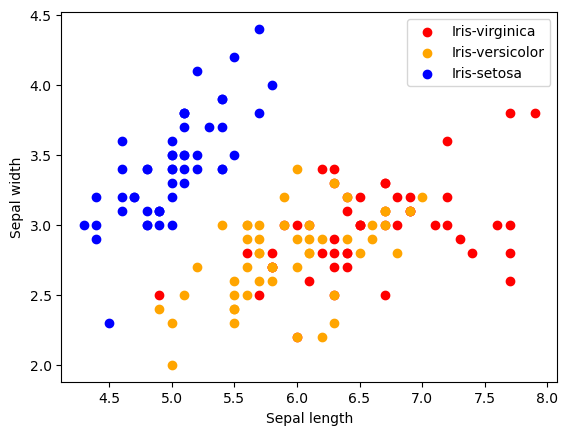

In [14]:
for i in range(3):
  #filter data on each class
  x=df[df['Species'] == species[i]]
  #plot the scatter plot
  plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'], c = colors[i], label = species[i])
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.legend()

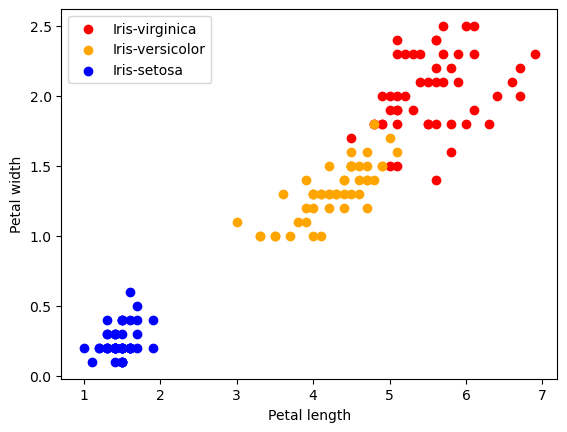

In [15]:
for i in range(3):
  #filter the data on each class 
  x=df[df['Species']==species[i]]
  #plot the scatter plot
  plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c=colors[i],label=species[i])
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend()


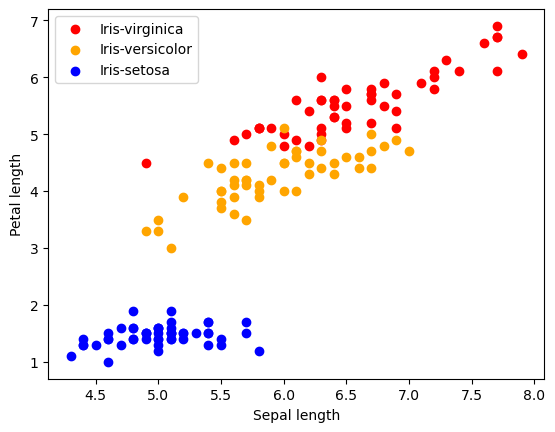

In [16]:
for i in range(3):
  #filter data on each class
  x=df[df['Species'] == species[i]]
  #plot the scatter plot
  plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'], c = colors[i], label = species[i])
plt.xlabel("Sepal length")
plt.ylabel("Petal length")
plt.legend()

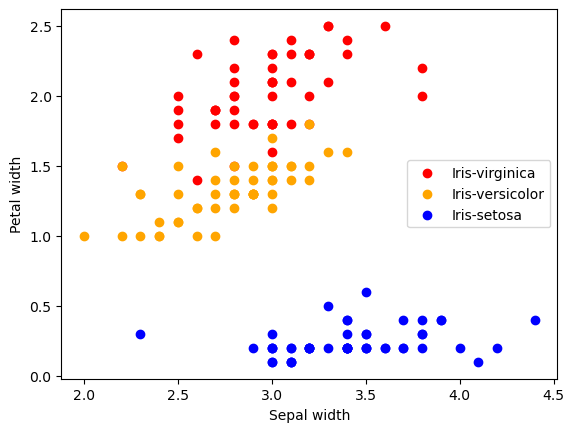

In [17]:
for i in range(3):
  #filter data on each class
  x=df[df['Species'] == species[i]]
  #plot the scatter plot
  plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'], c = colors[i], label = species[i])
plt.xlabel("Sepal width")
plt.ylabel("Petal width")
plt.legend()

In [18]:
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['number']) 

# Calculate and display the correlation matrix
numerical_df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

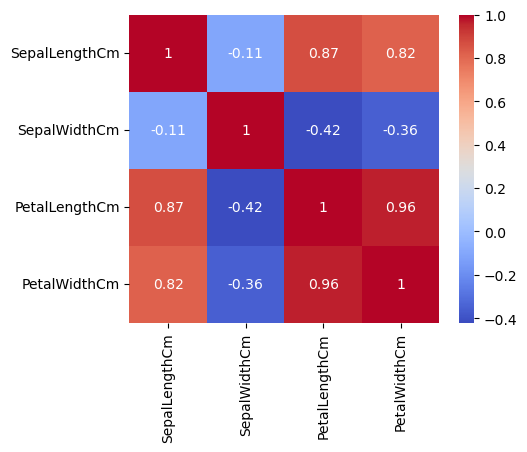

In [19]:
corr = numerical_df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

In [20]:
#from sklearn.preprocessing import LabelEncoder
#le=LabelEncoder()
#transform the string labels to integer
#df['Species']=le.fit_transform(of['Species'])
#df.head()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle

#input data
X=df.drop(columns=['Species'])
#output data
Y=df['Species']
#split the data for train and test
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30)

In [22]:
#Logistic Regression
model_selection=LogisticRegression()
model_selection.fit(x_train,y_train)
print("Logistic Regression Accuracy:",model_selection.score(x_test,y_test)*100)

Logistic Regression Accuracy: 97.77777777777777


In [23]:
#model training
model_selection.fit(x_train.values,y_train.values)

LogisticRegression()

In [24]:
#print metric to get performance
print("Accuracy:",model_selection.score(x_test,y_test)*100) 

Accuracy: 97.77777777777777


In [25]:
# k-nearest neighbors
model_selection=KNeighborsClassifier()
model_selection.fit(x_train.values,y_train.values)
print("KNN Accuracy:",model_selection.score(x_test,y_test)*100)

KNN Accuracy: 97.77777777777777


In [26]:
model_selection.fit(x_train.values,y_train.values)  

KNeighborsClassifier()

In [27]:
#print metric to get performance
print("Accuracy:",model_selection.score(x_test,y_test)*100)

Accuracy: 97.77777777777777


In [28]:
#decision tree
model_selection=DecisionTreeClassifier()
model_selection.fit(x_train.values,y_train.values)
print("Decision Tree Accuracy:",model_selection.score(x_test,y_test)*100)

Decision Tree Accuracy: 95.55555555555556


In [29]:
model_selection.fit(x_train.values,y_train.values)

DecisionTreeClassifier()

In [30]:
#print metric to get performance
print("Accuracy:",model_selection.score(x_test,y_test)*100)

Accuracy: 95.55555555555556


In [31]:
#save the model
import pickle
filename='saved_model.sav'
pickle.dump(model_selection,open(filename,'wb'))

In [32]:
import pickle

In [33]:
#save the updated model
filename='saved_model.sav'
try:
  with open(filename,'wb') as file:
    pickle.dump(model_selection,file)
  print("model saved successfully.")
except Exception as e:
  print(f"Error saving the model: {e}")


model saved successfully.


In [34]:
load_model=pickle.load(open(filename,'rb'))

In [35]:
load_model.predict([[6.0,2.2,4.0,1.0]])

array(['Iris-versicolor'], dtype=object)

In [36]:
import sklearn
sklearn.__version__


'1.4.2'

In [37]:
x_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
54,6.5,2.8,4.6,1.5
27,5.2,3.5,1.5,0.2
138,6.0,3.0,4.8,1.8
123,6.3,2.7,4.9,1.8
144,6.7,3.3,5.7,2.5


In [38]:
load_model.predict([[4,1,5,2]])

array(['Iris-virginica'], dtype=object)